In [ ]:
#install required tensorflow version
!pip install tensorflow==2.12.1

Loading CIFAR-10 dataset...
170498071/170498071 [==============================] - 19s 0us/step
Training data shape: (50000, 32, 32, 3), Test data shape: (10000, 32, 32, 3)


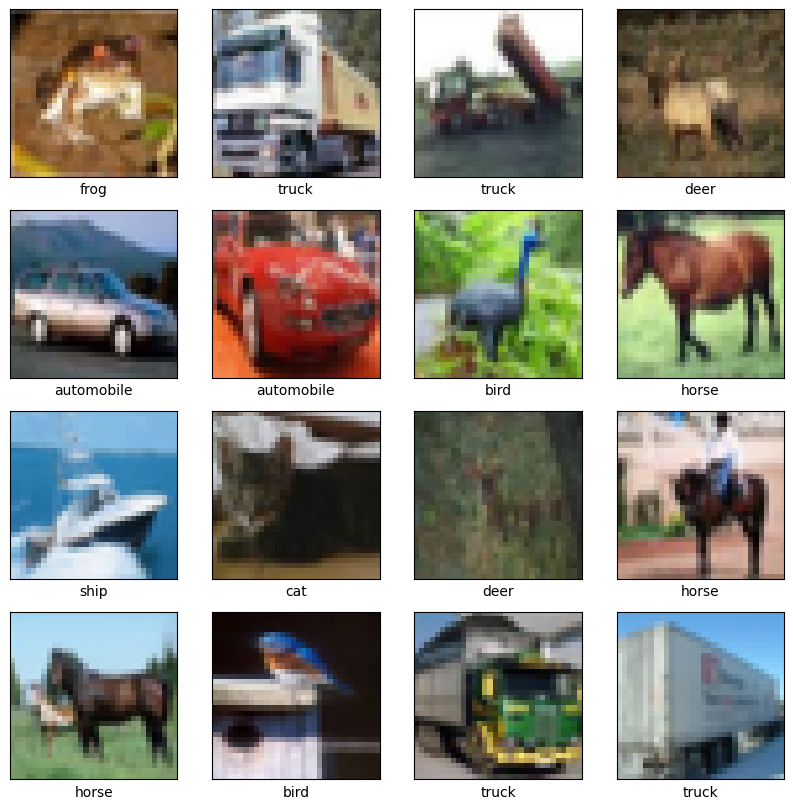

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

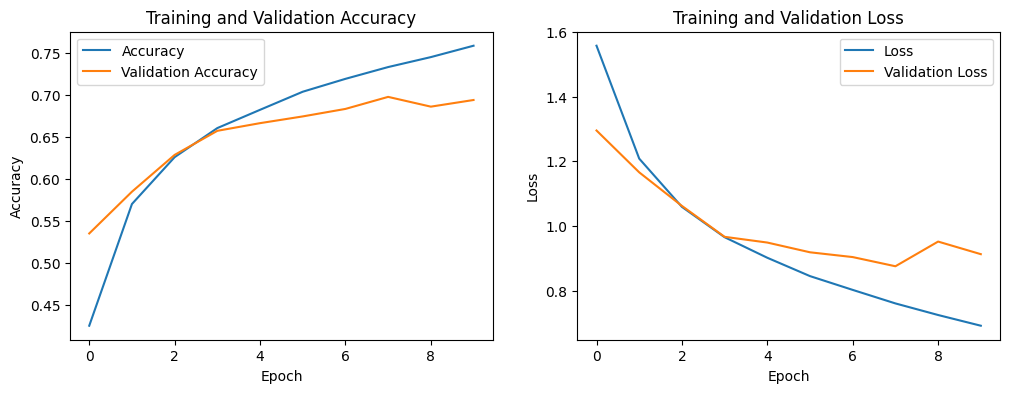

Evaluating the model...
313/313 - 4s - loss: 0.9135 - accuracy: 0.6937 - 4s/epoch - 14ms/step
Test accuracy: 0.69


In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verify the data shape
print(f"Training data shape: {x_train.shape}, Test data shape: {x_test.shape}")

# Map class indices to class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Visualize some training data
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Build the CNN model
model = models.Sequential([
    # Convolutional and Pooling layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer: 10 classes
])

# Summary of the model
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
print("Training the model...")
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Evaluate the model on test data
print("Evaluating the model...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


In [5]:
# Define the export path
export_path = "tf_model/1"

# Save the model
tf.saved_model.save(model, export_path)

In [6]:
cd tf_model

/content/tf_model/tf_model


In [7]:
#compress files with folder 1/
!tar -czvf model.tar.gz 1

1/
1/fingerprint.pb
1/saved_model.pb
1/assets/
1/variables/
1/variables/variables.index
1/variables/variables.data-00000-of-00001


In [10]:
import numpy as np

#input image for testing prediction
input = np.expand_dims(x_test[1], axis=0)

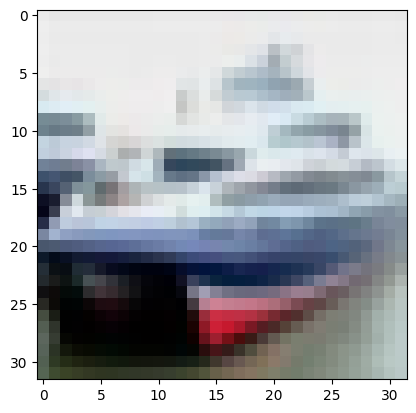

In [11]:
plt.imshow(input[0])

In [12]:
import requests

SECRET_KEY = "YOUR_SECRET_KEY"
ENDPOINT = "YOUR_API_ENDPOINT"


# Headers including the Bearer token
headers = {
    "Authorization": f"Bearer {SECRET_KEY}",
    "Content-Type": "application/json"
}

# Data to send in the POST request
data = {
    "instances": input.tolist()
}

# Make the POST request
response = requests.post(ENDPOINT, headers=headers, json=data)

# Print the response
if response.status_code == 200:
    output= response.json()
    print(output)

    # Find the index of the maximum value
    max_index = np.argmax(output['prediction'])
    # Find the corresponding class name
    predicted_class = class_names[max_index]

    print(f"The image belongs to the class: {predicted_class}")

{'prediction': [[4.58276558, 6.88504267, -5.06168556, -2.46618581, -7.81707239, -7.57001829, -7.72198772, -11.1372547, 9.40447, 1.65248144]]}
The image belongs to the class: ship
